<a href="https://colab.research.google.com/github/ChiaHouTan/smarttechca1/blob/main/D00223937_Smart_Tech_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ChiaHouTan/smarttechca1.git

Cloning into 'smarttechca1'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 36 (delta 7), reused 21 (delta 4), pack-reused 11
Receiving objects: 100% (36/36), 188.92 MiB | 27.59 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Updating files: 100% (15/15), done.


In [213]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pickle
import pandas as pd
import random
import cv2
import requests
from PIL import Image

#git add .
#git status
#git commit -m "First Commit" then after finish everything do below
#git branch -M main
#git push -uf origin main

np.random.seed(0)

def unpickle_data():
  trains_data = []
  file_paths = ['/content/smarttechca1/cifar-10/data_batch_1',
                 '/content/smarttechca1/cifar-10/data_batch_2',
                 '/content/smarttechca1/cifar-10/data_batch_3',
                 '/content/smarttechca1/cifar-10/data_batch_4',
                 '/content/smarttechca1/cifar-10/data_batch_5']
  for file_path in file_paths:
         with open(file_path, 'rb') as f:
             train_data = pickle.load(f, encoding='bytes')
             trains_data.append(train_data)
  with open('/content/smarttechca1/cifar-10/test_batch', 'rb') as f:
    test_data = pickle.load(f, encoding='bytes')
  return trains_data, test_data

In [214]:
trains_data, test_data = unpickle_data()
X_train = np.concatenate([np.array(train_data[b'data']) for train_data in trains_data])
y_train = np.concatenate([np.array(train_data[b'labels']) for train_data in trains_data])
X_test, y_test = np.array(test_data[b'data']), np.array(test_data[b'labels'])

In [215]:
print(X_train.shape)
print(X_test.shape)

(50000, 3072)
(10000, 3072)


In [216]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of training images is different from the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of test images is different from the number of labels"
X_train = X_train.reshape((50000, 32, 32, 3))
assert(X_train.shape[1:] == (32, 32, 3)), "The training images are not 32x32x3"
X_test = X_test.reshape((10000, 32, 32, 3))
assert(X_test.shape[1:] == (32, 32, 3)), "The training images are not 32x32x3"

In [217]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)


In [218]:
with open('/content/smarttechca1/cifar-10/batches.meta', 'rb') as f:
    data = pickle.load(f, encoding='bytes')
print(data)

{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}


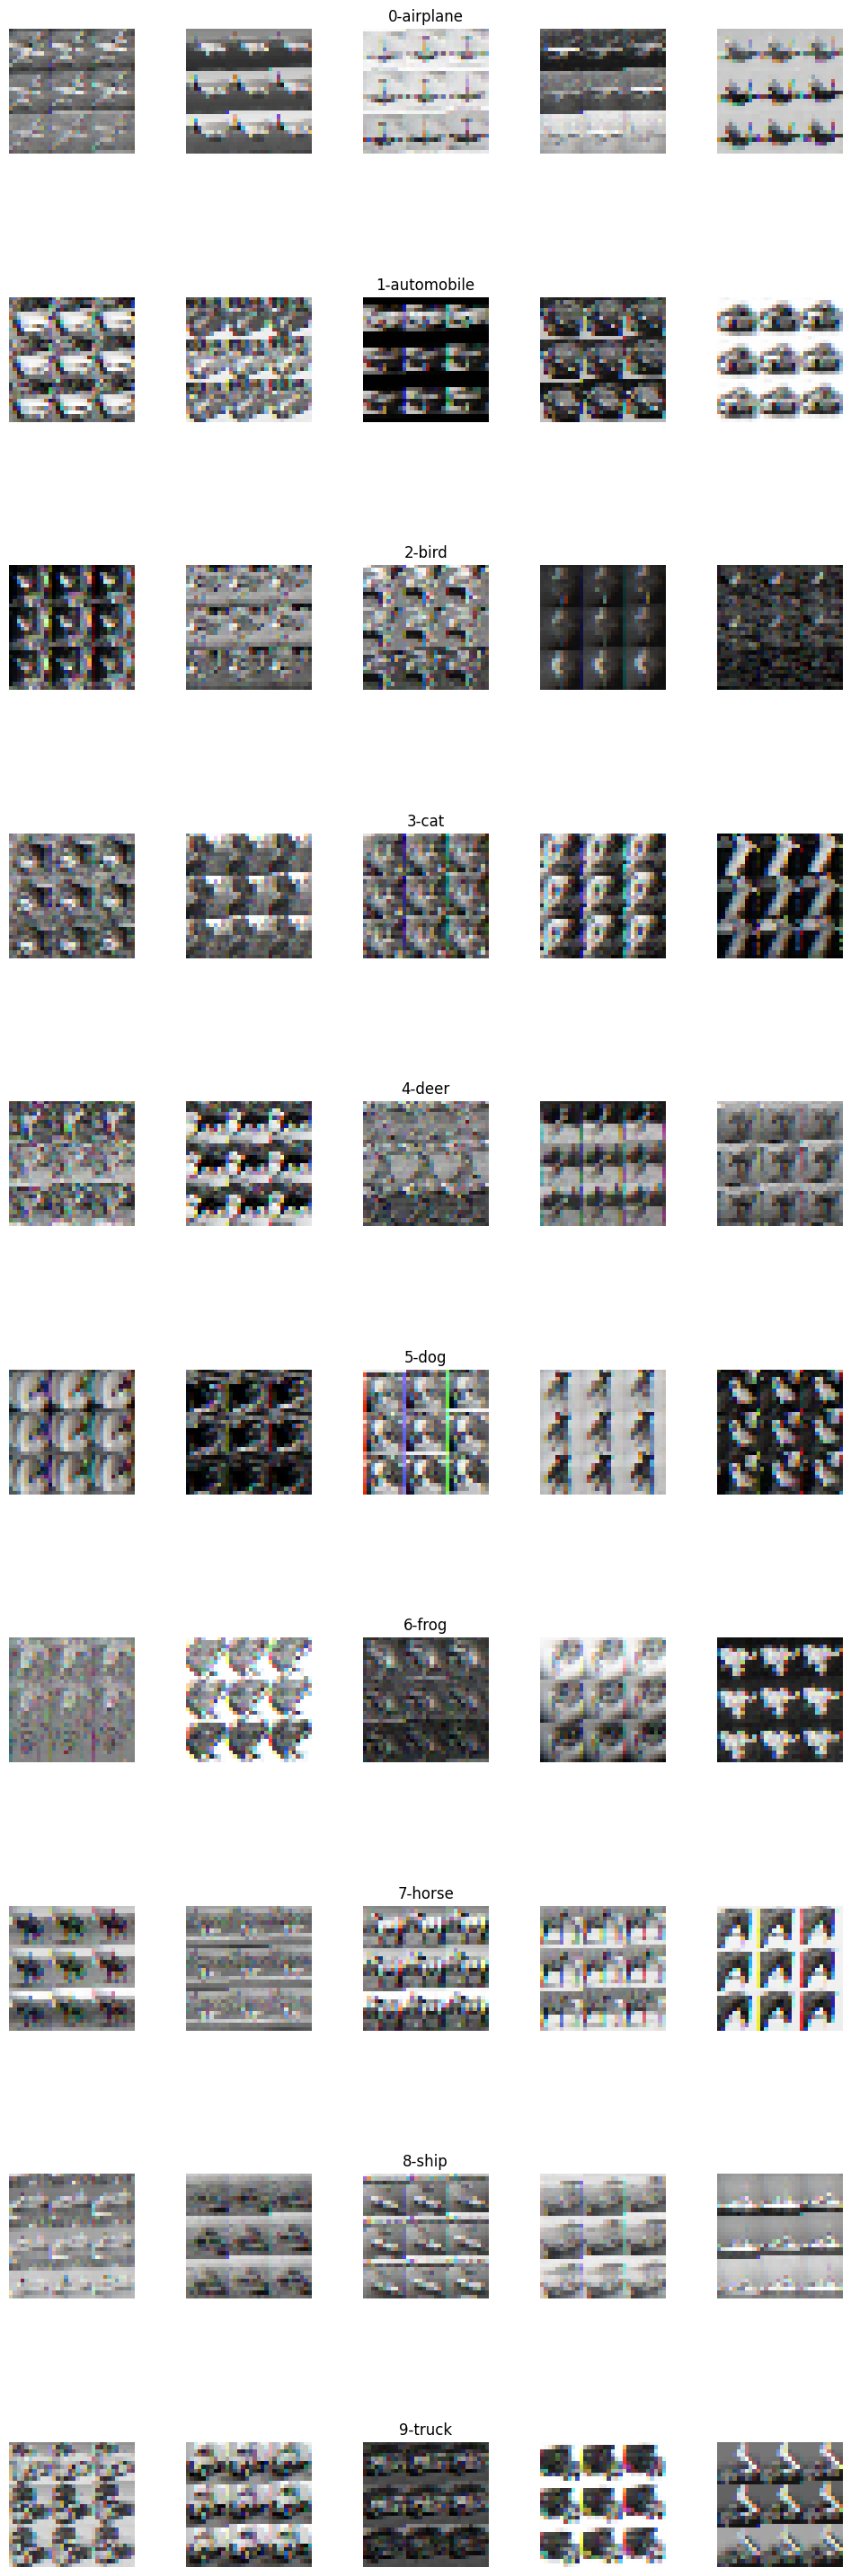

In [219]:
num_of_samples = []
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize=(10, 30))
fig.tight_layout()
# for i in range(cols):
#   for j, row in data.iterrows():
#     x_selected = X_train[y_train == j]
#     axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap('gray'))
#     axs[j][i].axis("off")
#     if i == 2:
#       num_of_samples.append(len(x_selected))
#       axs[j][i].set_title(str(j) + "-" + row["SignName"])
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[np.random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            num_of_samples.append(len(x_selected))
            axs[j][i].set_title(str(j) + "-" + str(data[b'label_names'][j].decode('utf-8')))

